<a href="https://colab.research.google.com/github/nathsmo/Elements-of-ML/blob/master/Clase_Practica_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

# Cargando a los datos
df = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Auto.csv",
                 na_values='?').dropna()

# Preprocesando a los datos
df.horsepower = preprocessing.scale(df.horsepower)

# Instanciamos al regresor lineal
regr = LinearRegression()



In [0]:
def plot_errors(poly_degree, random_seed, num_samples, val_size):
    """
    Tomando al dataframe df con los datos de Auto, graficaremos a los
    caballos de fuerza, horsepower, vs. las millas por galon, mpg. Utilizaremos
    a distintos grados de polinomios para ver cómo varían el error de
    entrenamiento esperadod E[err] y el error de prueba esperado E[Err].
    INPUT:
        poly_degree: grado máximo de polinomio utilizado por PolynomialFeatures
        random_seed: para iniciar al generador de números pseudoaleatorios
        num_samples: el número total de muestras aleatorias que se tomarán
        val_size: tamaño del conjunto de validación (entre 0 y 1)
    OUTPUT:
        Gráfica de los errores, tantos los errores resultantes de entrenamiento
        y validación de cada corrida individual, como el error esperado (media)
        de los errores de entrenamiento y validaciónself.
        Se grafica, además, una líne vertical indicando cuál es el grado del
        polinomio que minimiza a cada error esperado.
    """
    random_st = np.arange(random_seed, random_seed+num_samples)
    poly = np.arange(1, poly_degree+1)

    exp_err = []
    train_err = []

    for r in random_st:
        train_mse = []
        val_mse = []
        for p in poly:
            pol = PolynomialFeatures(p)
            X_poly = pol.fit_transform(df.horsepower.values.reshape(-1, 1))
            X_train, X_val, y_train, y_val = train_test_split(X_poly,
                                                              df.mpg.ravel(),
                                                              test_size=val_size,
                                                              random_state=r)
            regr.fit(X_train, y_train)
            train_mse.append(mean_squared_error(y_train, regr.predict(X_train)))
            val_mse.append(mean_squared_error(y_val, regr.predict(X_val)))
        train_err.append(train_mse)
        exp_err.append(val_mse)
        plt.plot(poly, train_mse, c="b", alpha=0.05)
        plt.plot(poly, val_mse, c="r", alpha=0.05)
    plt.plot(poly, np.mean(train_err, axis=0), c="b", label="E[err]")
    plt.plot(poly, np.mean(exp_err, axis=0), c="r", label="Err")
    plt.title("{} particiones aleatorias de los datos".format(num_samples))
    plt.ylabel("Error cuadratico medio")
    plt.ylim(15, 30)
    plt.xlabel("Grado del polinomio")
    plt.xticks(np.arange(2, poly_degree+1, 2))
    plt.axvline(x=np.argmin(np.mean(exp_err, axis=0))+1, c="r",
                linestyle="--", label="Val. min")
    plt.axvline(x=np.argmin(np.mean(train_err, axis=0))+1, c="b",
                linestyle="--", label="Entren. min")
    plt.legend()
    plt.show()
    

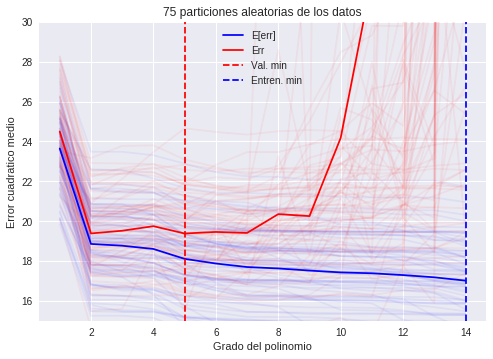

In [0]:
plot_errors(14,42, 75, 0.5)


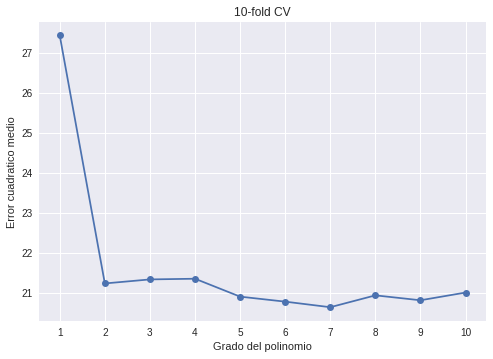

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

pol_d = np.arange(1,11)
k_folds = 10


scores = []
for p in pol_d:
  poly = PolynomialFeatures(p)
  X_poly = poly.fit_transform(df.horsepower.values.reshape(-1,1))
  kf= KFold(n_splits=k_folds, random_state = 0)
  score = cross_val_score(regr,
                         X_poly, 
                         df.mpg,
                         cv = kf,
                         scoring="neg_mean_squared_error").mean()
  scores.append(score)
  
plt.plot(pol_d, np.array(scores)*-1, "-o")
plt.title("10-fold CV")
plt.ylabel("Error cuadratico medio")
plt.xlabel("Grado del polinomio")
plt.xticks(pol_d)
plt.show()